In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541531 sha256=515b6120e6186a76259a5ecb5e2024037345a988ef26fb45228f3d464a92fa61
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja


In [3]:
import pandas as pd
import missingno as msno
import wordninja
import re
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

**Data Cleansing**

In [4]:
trainfeatures = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 4 - supervised machine learning/train_features.csv')
trainlabel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 4 - supervised machine learning/train_label.csv')
testfeatures = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 4 - supervised machine learning/test_feature.csv')

In [5]:
trainfeatures

,facilities,rating,location
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol
...,...,...,...
3061,barInternet,NaN,Andeman
3062,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia
3063,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian
3064,Restaurant,NaN,Hallerson


In [6]:
trainlabel

,Price
0,"13,500avg/night"
1,"13,000avg/night"
2,"19,000avg/night"
3,"6,000avg/night"
4,"20,000avg/night"
...,...
3061,"31,625avg/night"
3062,"30,500avg/night"
3063,"14,000avg/night"
3064,"8,500avg/night"


In [7]:
testfeatures

,ID,facilities,rating,location
0,0,GymrestaurantbarInternetSwimmingPools,8.0 ExcellentFrom 1 reviews,Stokol
1,1,Poolrestaurantgyminternetbar,7.4 Very GoodFrom 22 reviews,Hallerson
2,2,BARSwimmingPoolsInternetgym,0.0 FairFrom 4 reviews,Hallerson
3,3,gymSwimmingPoolsBARintrnetRestaurant,6.8 Very GoodFrom 13 reviews,Andeman
4,4,gymRestaurantpoolbarintrnet,0.0 FairFrom 9 reviews,Hallerson
...,...,...,...,...
762,762,BARPoolRestaurantGym,8.1 ExcellentFrom 9 reviews,Andeman
763,763,intrnetGympoolrestaurantBar,8.0 ExcellentFrom 4 reviews,Wanderland
764,764,RestaurantgymintrnetBARswimmingpools,7.4 Very GoodFrom 19 reviews,Andeman
765,765,gymInternetBarpoolRestaurant,9.0 ExcellentFrom 17 reviews,Hallerson




---


1. Missing Data

In [8]:
def missing_values_table(trainlabel):
        mis_val = trainlabel.isnull().sum()

        mis_val_percent = 100 * trainlabel.isnull().sum() / len(trainlabel)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(trainlabel.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [9]:
trainlabel_missing = missing_values_table(trainlabel)
trainlabel_missing

Your selected dataframe has 1 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
def missing_values_table(testfeatures):
        mis_val = testfeatures.isnull().sum()

        mis_val_percent = 100 * testfeatures.isnull().sum() / len(testfeatures)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(testfeatures.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [10]:
testfeatures_missing = missing_values_table(testfeatures)
testfeatures_missing

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [11]:
def missing_values_table(trainfeatures):
        mis_val = trainfeatures.isnull().sum()

        mis_val_percent = 100 * trainfeatures.isnull().sum() / len(trainfeatures)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(trainfeatures.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [12]:
trainfeatures_missing = missing_values_table(trainfeatures)
trainfeatures_missing

Your selected dataframe has 3 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
rating,637,20.8
facilities,301,9.8


<Axes: >

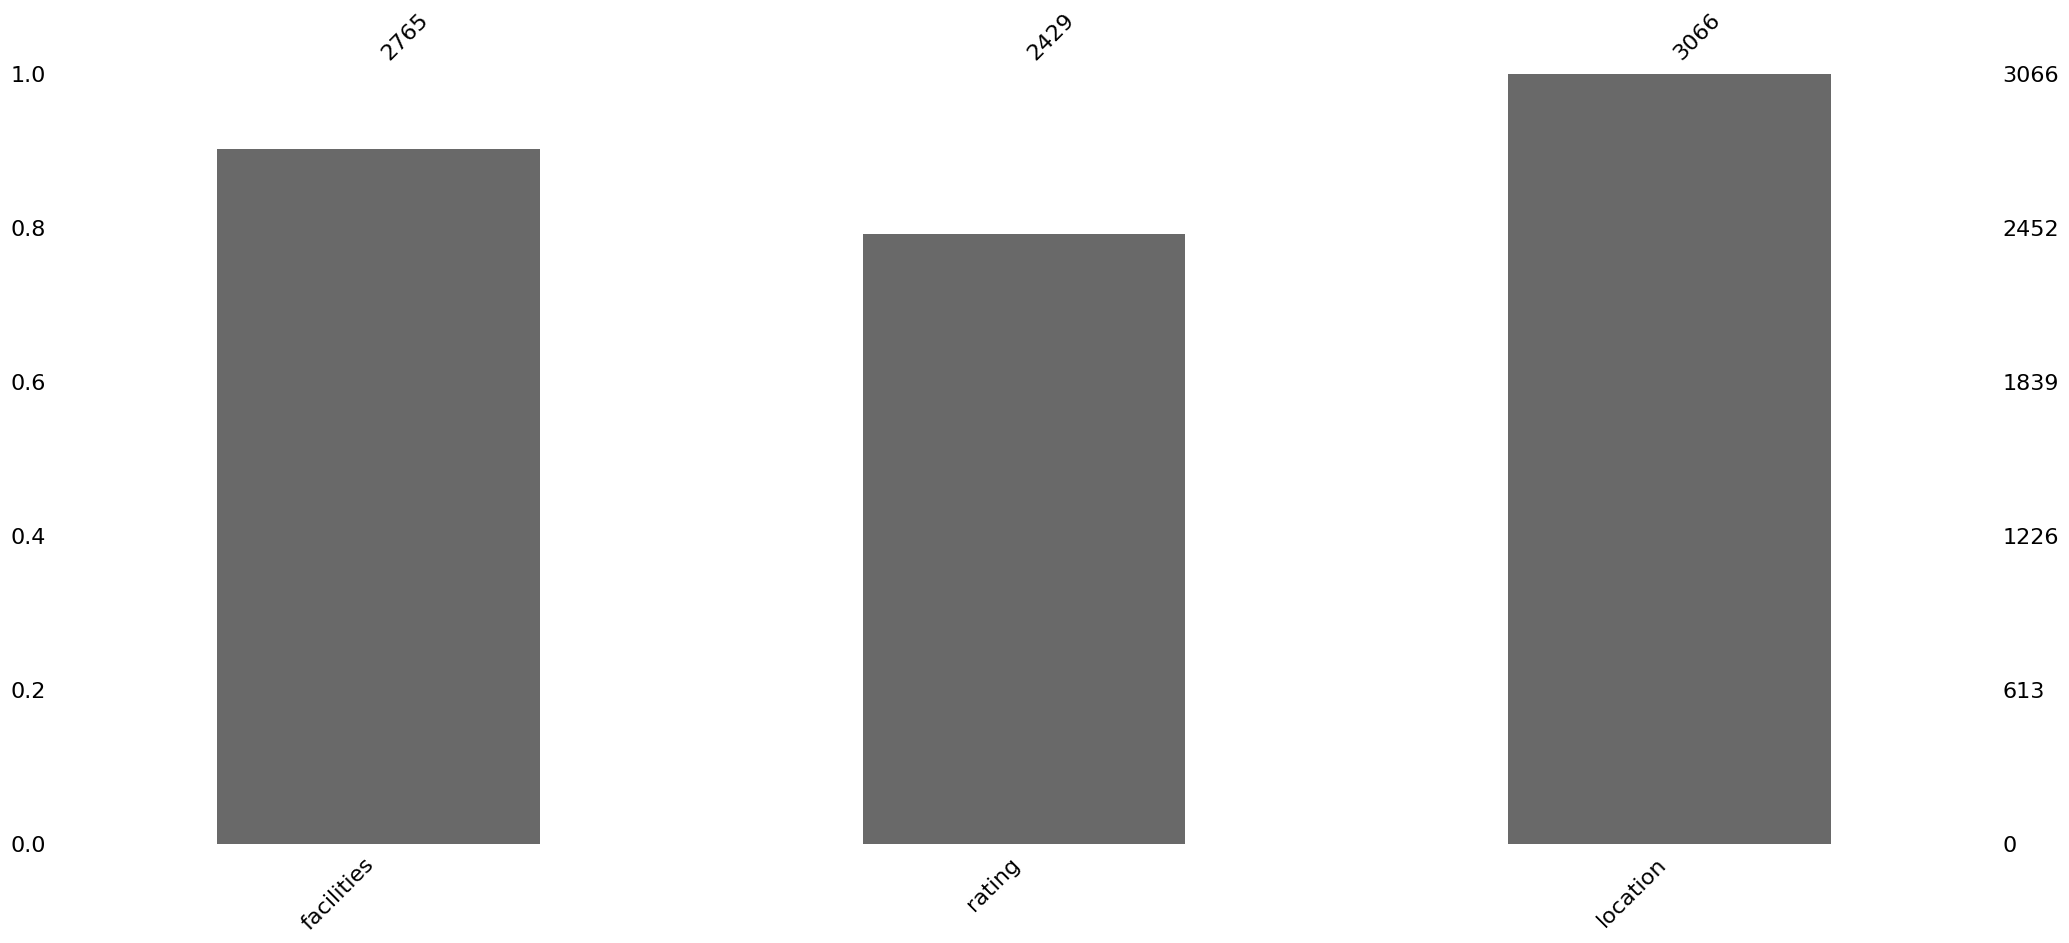

In [13]:
msno.bar(trainfeatures)

<Axes: >

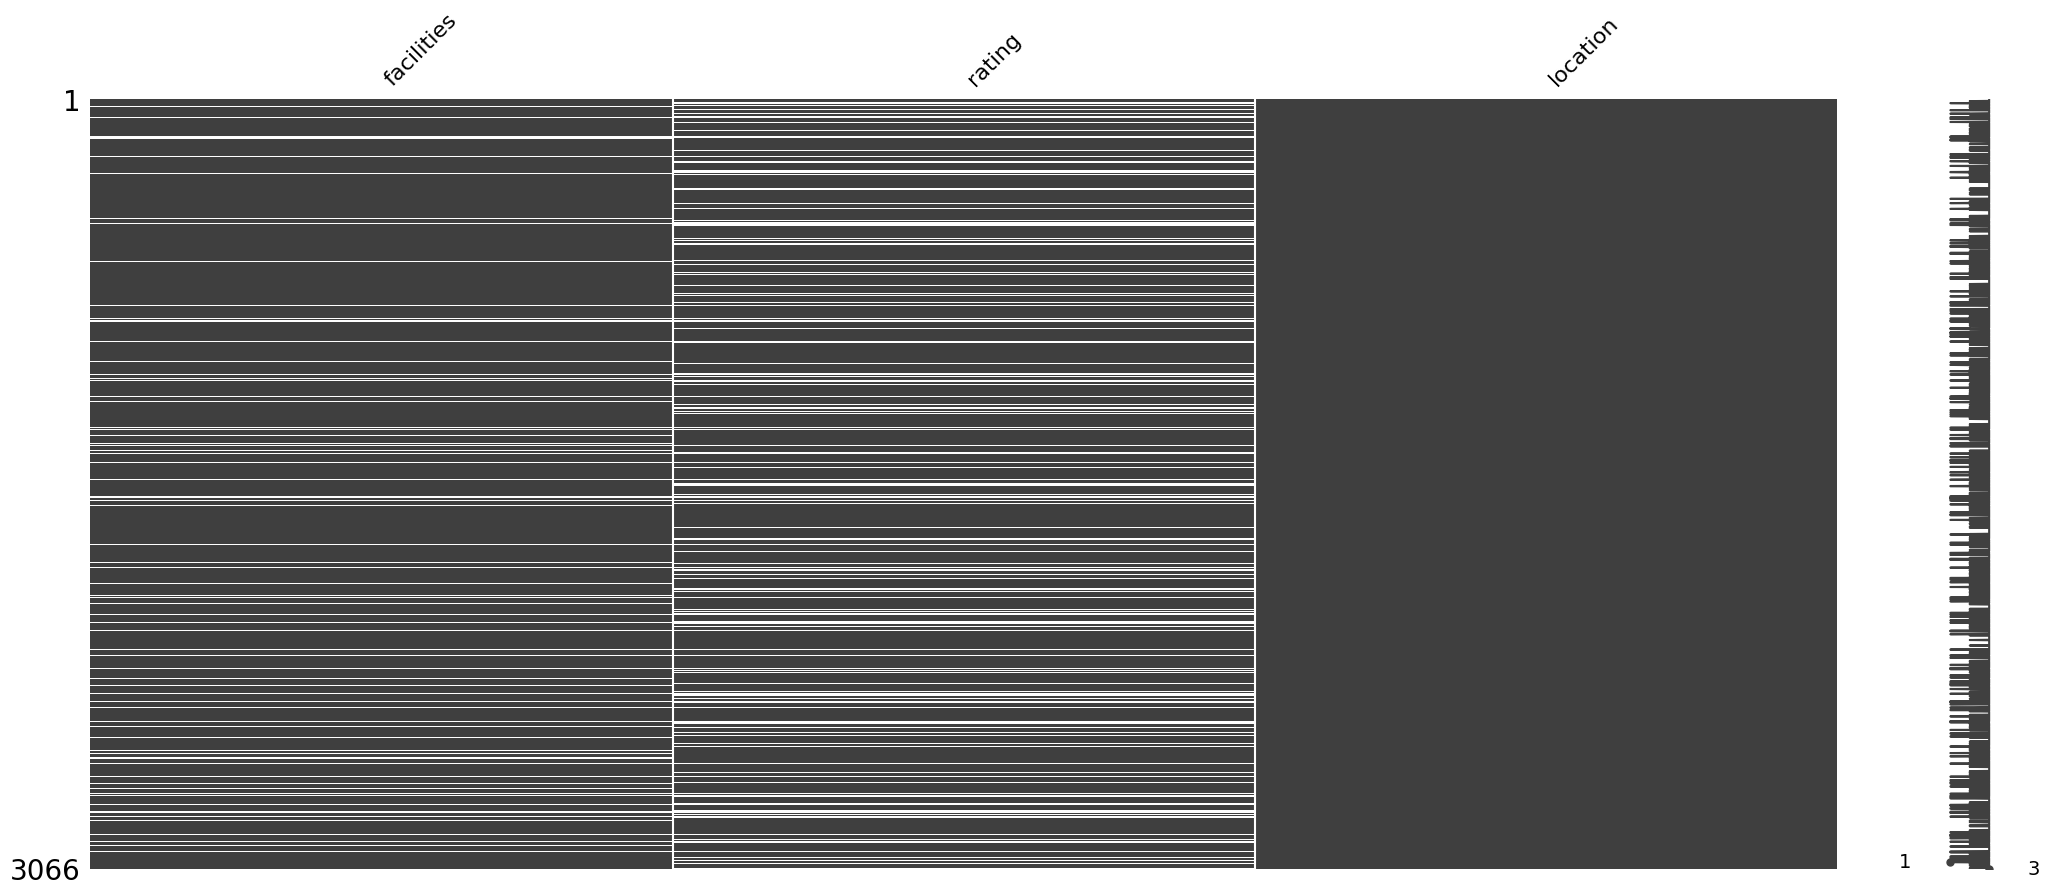

In [14]:
msno.matrix(trainfeatures)

In [15]:
trainfeatures_rowmissing = trainfeatures[trainfeatures.isnull().any(axis=1)]
trainfeatures_rowmissing

,facilities,rating,location
8,intrnetbarRestaurant,NaN,Andeman
13,internetRestaurant,NaN,Stokol
16,NaN,NaN,Machlessvile
17,BAR,NaN,Stokol
25,bar,NaN,Wanderland
...,...,...,...
3045,InternetrestaurantgymBARswimmingpools,NaN,Willsmian
3046,barintrnetRestaurant,NaN,Stokol
3051,restaurantswimmingpools,NaN,Wanderland
3061,barInternet,NaN,Andeman


In [16]:
trainfeatures_missinghandled = trainfeatures.dropna(axis=0, how='any')

cleaned_size = len(trainfeatures_missinghandled)
original_size = len(trainfeatures)

print(f"Original size: {original_size}")
print(f"Cleaned size: {cleaned_size}")

Original size: 3066
Cleaned size: 2327


In [17]:
missing_values = trainfeatures_missinghandled.isnull().sum()
print(missing_values)

facilities    0
rating        0
location      0
dtype: int64




---


2. Duplicate Data

In [18]:
duplicate = trainfeatures_missinghandled.duplicated(keep=False)
duplicate_groups = trainfeatures_missinghandled[duplicate].groupby(list(trainfeatures_missinghandled.columns)).size().reset_index(name='count')
duplicate_groups

,facilities,rating,location,count
0,BAR,7.9 Very GoodFrom 12 reviews,Hallerson,2
1,BAR,7.9 Very GoodFrom 12 reviews,Stokol,2
2,BAR,7.9 Very GoodFrom 12 reviews,Wanderland,2
3,BARRestaurant,8.8 ExcellentFrom 1 review,Stokol,2
4,BarRestaurant,8.0 ExcellentFrom 6 reviews,Stokol,2
5,Internet,8.9 ExcellentFrom 11 reviews,Andeman,2
6,Internet,8.9 ExcellentFrom 11 reviews,Hallerson,2
7,InternetBar,7.4 Very GoodFrom 40 reviews,Stokol,2
8,Restaurant,6.0 Very GoodFrom 79 reviews,Hallerson,2
9,Restaurant,6.1 Very GoodFrom 24 reviews,Wanderland,2


In [19]:
trainfeatures_rowduplicated = trainfeatures_missinghandled[trainfeatures_missinghandled.duplicated(keep='first')]
trainfeatures_rowduplicated

,facilities,rating,location
856,Internet,8.9 ExcellentFrom 11 reviews,Andeman
861,barrestaurant,8.4 ExcellentFrom 1 review,Wanderland
1237,Restaurant,7.1 Very GoodFrom 68 reviews,Uberlandia
1281,Restaurant,6.0 Very GoodFrom 79 reviews,Hallerson
1355,poolbar,8.2 ExcellentFrom 152 reviews,Uberlandia
1426,Restaurantbar,7.0 Very GoodFrom 24 reviews,Andeman
1501,intrnet,7.7 Very GoodFrom 18 reviews,Hallerson
1644,Restaurant,7.2 Very GoodFrom 12 reviews,Uberlandia
1739,barrestaurantinternet,5.6 GoodFrom 50 reviews,Andeman
1819,RestaurantBar,5.6 GoodFrom 1 review,Machlessvile


In [20]:
for _, row in duplicate_groups.iterrows():
    duplicate_rows = trainfeatures_missinghandled[
        (trainfeatures_missinghandled[list(trainfeatures_missinghandled.columns)] == row[:-1]).all(axis=1)
    ]
    print("Row:", duplicate_rows.index.tolist())
    print(duplicate_rows)
    print()

Row: [1510, 2538]
     facilities                        rating   location
1510        BAR  7.9 Very GoodFrom 12 reviews  Hallerson
2538        BAR  7.9 Very GoodFrom 12 reviews  Hallerson

Row: [749, 1975]
     facilities                        rating location
749         BAR  7.9 Very GoodFrom 12 reviews   Stokol
1975        BAR  7.9 Very GoodFrom 12 reviews   Stokol

Row: [1446, 2155]
     facilities                        rating    location
1446        BAR  7.9 Very GoodFrom 12 reviews  Wanderland
2155        BAR  7.9 Very GoodFrom 12 reviews  Wanderland

Row: [1694, 2382]
         facilities                      rating location
1694  BARRestaurant  8.8 ExcellentFrom 1 review   Stokol
2382  BARRestaurant  8.8 ExcellentFrom 1 review   Stokol

Row: [1402, 2073]
         facilities                       rating location
1402  BarRestaurant  8.0 ExcellentFrom 6 reviews   Stokol
2073  BarRestaurant  8.0 ExcellentFrom 6 reviews   Stokol

Row: [173, 856]
    facilities                     

In [21]:
trainfeatures_duplicatehandled = trainfeatures_missinghandled.copy()
trainfeatures_duplicatehandled.drop_duplicates(inplace=True, keep='first')
trainfeatures_duplicatehandled.shape

(2306, 3)

<Axes: >

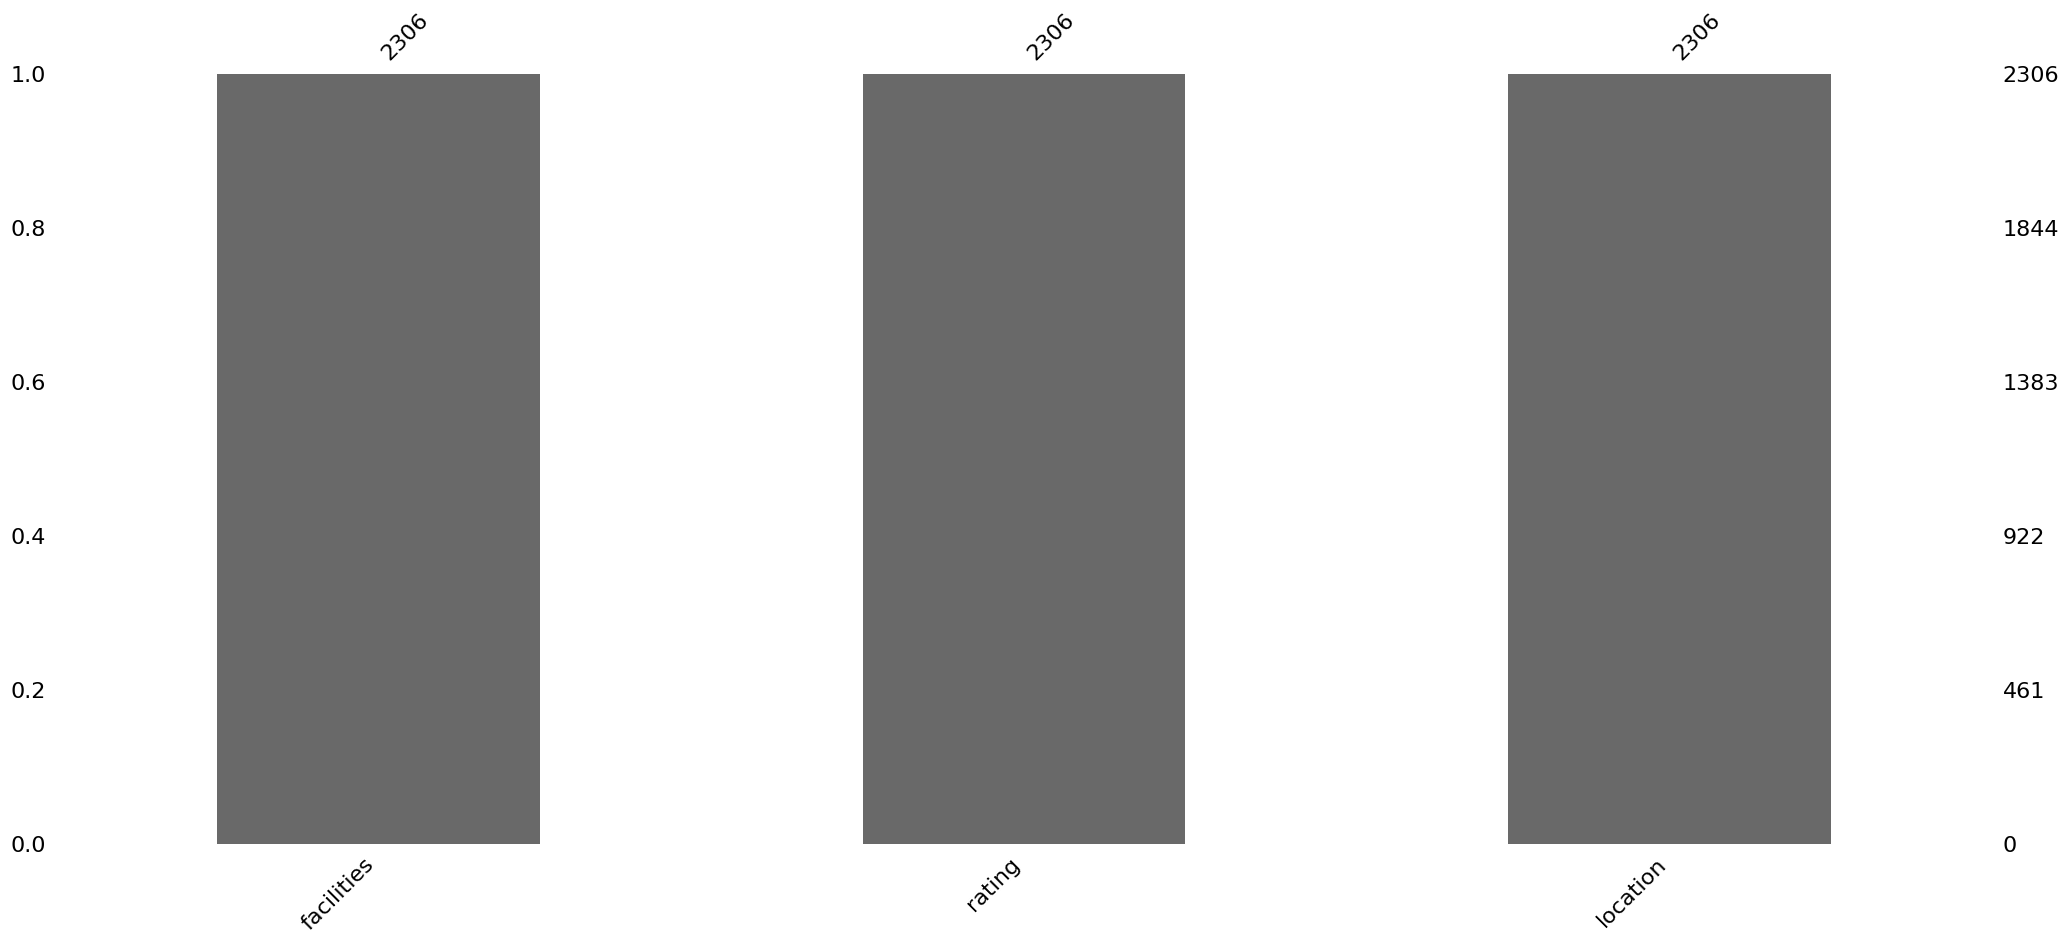

In [22]:
msno.bar(trainfeatures_duplicatehandled)



---


3. Normalize Data

a. Train Features

In [23]:
trainfeatures_lowercase = trainfeatures_duplicatehandled.applymap(lambda x: x.lower() if isinstance(x, str) else x)
trainfeatures_lowercase

,facilities,rating,location
0,restaurantbarswimmingpools,7.8 very goodfrom 10 reviews,stokol
1,intrnetrestaurantgym,5.6 goodfrom 4 reviews,machlessvile
2,restaurantgympoolbar,7.2 very goodfrom 38 reviews,wanderland
3,barrestaurant,7.3 very goodfrom 6 reviews,uberlandia
4,internetrestaurant,7.2 very goodfrom 30 reviews,stokol
...,...,...,...
3059,restaurantbar,7.6 very goodfrom 3 reviews,andeman
3060,barrestaurantpoolgym,7.8 very goodfrom 351 reviews,andeman
3062,restaurantbarinternet,8.1 excellentfrom 4 reviews,uberlandia
3063,barrestaurantswimmingpools,6.7 very goodfrom 10 reviews,willsmian


In [24]:
filtered_rating = trainfeatures_lowercase[~trainfeatures_lowercase['rating'].str.contains('\.')]
filtered_rating

,facilities,rating,location
12,barrestaurant,from 1 review,stokol
151,barrestaurant,from 1 review,ubisville
323,bargymrestaurantpool,from 1 review,andeman
536,restaurantbar,from 1 review,andeman
564,swimmingpoolsrestaurantgymbar,from 1 review,willsmian
614,restaurantbarswimmingpools,from 2 reviews,andeman
833,restaurantpoolbarintrnet,from 1 review,andeman
1002,barrestaurantgymswimmingpools,from 1 review,stokol
1013,barrestaurantpoolinternet,from 1 review,hallerson
1018,restaurantswimmingpoolsbargym,from 1 review,stokol


In [25]:
len(filtered_rating)

23

In [26]:
trainfeatures_ratingnormalized = trainfeatures_lowercase[trainfeatures_lowercase['rating'].str.contains('\.', na=False)]
trainfeatures_ratingnormalized

,facilities,rating,location
0,restaurantbarswimmingpools,7.8 very goodfrom 10 reviews,stokol
1,intrnetrestaurantgym,5.6 goodfrom 4 reviews,machlessvile
2,restaurantgympoolbar,7.2 very goodfrom 38 reviews,wanderland
3,barrestaurant,7.3 very goodfrom 6 reviews,uberlandia
4,internetrestaurant,7.2 very goodfrom 30 reviews,stokol
...,...,...,...
3059,restaurantbar,7.6 very goodfrom 3 reviews,andeman
3060,barrestaurantpoolgym,7.8 very goodfrom 351 reviews,andeman
3062,restaurantbarinternet,8.1 excellentfrom 4 reviews,uberlandia
3063,barrestaurantswimmingpools,6.7 very goodfrom 10 reviews,willsmian


In [27]:
trainfeatures_wordseparated = trainfeatures_ratingnormalized.copy()

def separate_words(text):
    tokens = text.split()

    split_tokens = []
    for token in tokens:
        if '.' in token:
            split_tokens.append(token)
        else:
            split_tokens.extend(wordninja.split(token))

    separated_text = ' '.join(split_tokens)

    return separated_text

trainfeatures_wordseparated['facilities'] = trainfeatures_wordseparated['facilities'].apply(separate_words)
trainfeatures_wordseparated['rating'] = trainfeatures_wordseparated['rating'].apply(separate_words)
trainfeatures_wordseparated

,facilities,rating,location
0,restaurant bar swimming pools,7.8 very good from 10 reviews,stokol
1,in tr net restaurant gym,5.6 good from 4 reviews,machlessvile
2,restaurant gym pool bar,7.2 very good from 38 reviews,wanderland
3,bar restaurant,7.3 very good from 6 reviews,uberlandia
4,internet restaurant,7.2 very good from 30 reviews,stokol
...,...,...,...
3059,restaurant bar,7.6 very good from 3 reviews,andeman
3060,bar restaurant pool gym,7.8 very good from 351 reviews,andeman
3062,restaurant bar internet,8.1 excellent from 4 reviews,uberlandia
3063,bar restaurant swimming pools,6.7 very good from 10 reviews,willsmian


In [28]:
word_counts = {}
pattern = re.compile(r'[^a-zA-Z]')
columns_to_count = ['facilities', 'rating']

for column in columns_to_count:
    for value in trainfeatures_wordseparated[column]:
        words = value.split()

        for word in words:
            word = pattern.sub('', word)

            if word:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1

for word, count in word_counts.items():
    print(f"Word: {word}")
    print(f"Count: {count}")
    print()

Word: restaurant
Count: 1951

Word: bar
Count: 1897

Word: swimming
Count: 451

Word: pools
Count: 451

Word: in
Count: 394

Word: tr
Count: 394

Word: net
Count: 394

Word: gym
Count: 599

Word: pool
Count: 459

Word: internet
Count: 771

Word: very
Count: 1249

Word: good
Count: 1493

Word: from
Count: 2283

Word: reviews
Count: 2083

Word: excellent
Count: 738

Word: fair
Count: 52

Word: review
Count: 200



In [29]:
trainfeatures_clean = trainfeatures_wordseparated.copy()
trainfeatures_clean['facilities'] = trainfeatures_clean['facilities'].str.replace(r'\bin tr net\b', 'internet')
trainfeatures_clean

<ipython-input-29-51140fb498fb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  trainfeatures_clean['facilities'] = trainfeatures_clean['facilities'].str.replace(r'\bin tr net\b', 'internet')


,facilities,rating,location
0,restaurant bar swimming pools,7.8 very good from 10 reviews,stokol
1,internet restaurant gym,5.6 good from 4 reviews,machlessvile
2,restaurant gym pool bar,7.2 very good from 38 reviews,wanderland
3,bar restaurant,7.3 very good from 6 reviews,uberlandia
4,internet restaurant,7.2 very good from 30 reviews,stokol
...,...,...,...
3059,restaurant bar,7.6 very good from 3 reviews,andeman
3060,bar restaurant pool gym,7.8 very good from 351 reviews,andeman
3062,restaurant bar internet,8.1 excellent from 4 reviews,uberlandia
3063,bar restaurant swimming pools,6.7 very good from 10 reviews,willsmian


b. Test Features

In [30]:
testfeatures_lowercase = testfeatures.applymap(lambda x: x.lower() if isinstance(x, str) else x)

testfeatures_lowercase.set_index('ID', inplace=True)
testfeatures_clean = testfeatures_lowercase.iloc[:, 1:]

testfeatures_lowercase

,facilities,rating,location
ID,,,
0,gymrestaurantbarinternetswimmingpools,8.0 excellentfrom 1 reviews,stokol
1,poolrestaurantgyminternetbar,7.4 very goodfrom 22 reviews,hallerson
2,barswimmingpoolsinternetgym,0.0 fairfrom 4 reviews,hallerson
3,gymswimmingpoolsbarintrnetrestaurant,6.8 very goodfrom 13 reviews,andeman
4,gymrestaurantpoolbarintrnet,0.0 fairfrom 9 reviews,hallerson
...,...,...,...
762,barpoolrestaurantgym,8.1 excellentfrom 9 reviews,andeman
763,intrnetgympoolrestaurantbar,8.0 excellentfrom 4 reviews,wanderland
764,restaurantgymintrnetbarswimmingpools,7.4 very goodfrom 19 reviews,andeman


In [31]:
testfeatures_wordseparated = testfeatures_lowercase.copy()

def separate_words(text):
    tokens = text.split()

    split_tokens = []
    for token in tokens:
        if '.' in token:
            split_tokens.append(token)
        else:
            split_tokens.extend(wordninja.split(token))

    separated_text = ' '.join(split_tokens)

    return separated_text

testfeatures_wordseparated['facilities'] = testfeatures_wordseparated['facilities'].apply(separate_words)
testfeatures_wordseparated['rating'] = testfeatures_wordseparated['rating'].apply(separate_words)
testfeatures_wordseparated

,facilities,rating,location
ID,,,
0,gym restaurant bar internet swimming pools,8.0 excellent from 1 reviews,stokol
1,pool restaurant gym internet bar,7.4 very good from 22 reviews,hallerson
2,bar swimming pools internet gym,0.0 fair from 4 reviews,hallerson
3,gym swimming pools bar in tr net restaurant,6.8 very good from 13 reviews,andeman
4,gym restaurant pool bar in tr net,0.0 fair from 9 reviews,hallerson
...,...,...,...
762,bar pool restaurant gym,8.1 excellent from 9 reviews,andeman
763,in tr net gym pool restaurant bar,8.0 excellent from 4 reviews,wanderland
764,restaurant gym in tr net bar swimming pools,7.4 very good from 19 reviews,andeman


In [32]:
word_counts = {}
pattern = re.compile(r'[^a-zA-Z]')
columns_to_count = ['facilities', 'rating']

for column in columns_to_count:
    for value in testfeatures_wordseparated[column]:
        words = value.split()

        for word in words:
            word = pattern.sub('', word)

            if word:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1

for word, count in word_counts.items():
    print(f"Word: {word}")
    print(f"Count: {count}")
    print()

Word: gym
Count: 767

Word: restaurant
Count: 736

Word: bar
Count: 727

Word: internet
Count: 496

Word: swimming
Count: 375

Word: pools
Count: 375

Word: pool
Count: 384

Word: in
Count: 262

Word: tr
Count: 262

Word: net
Count: 262

Word: excellent
Count: 198

Word: from
Count: 767

Word: reviews
Count: 767

Word: very
Count: 334

Word: good
Count: 381

Word: fair
Count: 188



In [33]:
testfeatures_clean = testfeatures_wordseparated.copy()
testfeatures_clean['facilities'] = testfeatures_clean['facilities'].str.replace(r'\bin tr net\b', 'internet')
testfeatures_clean

<ipython-input-33-128fbe68a33f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  testfeatures_clean['facilities'] = testfeatures_clean['facilities'].str.replace(r'\bin tr net\b', 'internet')


,facilities,rating,location
ID,,,
0,gym restaurant bar internet swimming pools,8.0 excellent from 1 reviews,stokol
1,pool restaurant gym internet bar,7.4 very good from 22 reviews,hallerson
2,bar swimming pools internet gym,0.0 fair from 4 reviews,hallerson
3,gym swimming pools bar internet restaurant,6.8 very good from 13 reviews,andeman
4,gym restaurant pool bar internet,0.0 fair from 9 reviews,hallerson
...,...,...,...
762,bar pool restaurant gym,8.1 excellent from 9 reviews,andeman
763,internet gym pool restaurant bar,8.0 excellent from 4 reviews,wanderland
764,restaurant gym internet bar swimming pools,7.4 very good from 19 reviews,andeman


c. Train Label

In [34]:
trainlabel

,Price
0,"13,500avg/night"
1,"13,000avg/night"
2,"19,000avg/night"
3,"6,000avg/night"
4,"20,000avg/night"
...,...
3061,"31,625avg/night"
3062,"30,500avg/night"
3063,"14,000avg/night"
3064,"8,500avg/night"


In [35]:
trainlabel_clean = trainlabel.copy()

trainlabel_clean = trainlabel_clean.drop(trainfeatures_rowmissing.index)
trainlabel_clean = trainlabel_clean.drop(trainfeatures_rowduplicated.index)
trainlabel_clean = trainlabel_clean.drop(filtered_rating.index)
trainlabel_clean = trainlabel_clean.reset_index(drop=True)
trainlabel_clean['Price'] = trainlabel_clean['Price'].apply(lambda x: re.sub(r'\D', '', str(x)))
trainlabel_clean['Price'] = pd.to_numeric(trainlabel_clean['Price'])

trainlabel_clean

,Price
0,13500
1,13000
2,19000
3,6000
4,20000
...,...
2278,5000
2279,30000
2280,30500
2281,14000


**Feature Processing**

1. Train Features

a. Feature Generation

In [36]:
train_featuregeneration = trainfeatures_clean.copy()

train_featuregeneration['rating score'] = train_featuregeneration['rating'].str.extract('(\d+\.\d+)')
train_featuregeneration['review score'] = train_featuregeneration['rating'].str.extract(r'(\bvery good\b|\bexcellent\b|\bfair\b)', flags=re.IGNORECASE)
train_featuregeneration['review score'] = train_featuregeneration['review score'].fillna('good')
pattern = r'(\d+)\s*reviews?'
train_featuregeneration['total review'] = train_featuregeneration['rating'].str.extract(pattern, expand=False)
train_featuregeneration.drop('rating', axis=1, inplace=True)

train_featuregeneration

,facilities,location,rating score,review score,total review
0,restaurant bar swimming pools,stokol,7.8,very good,10
1,internet restaurant gym,machlessvile,5.6,good,4
2,restaurant gym pool bar,wanderland,7.2,very good,38
3,bar restaurant,uberlandia,7.3,very good,6
4,internet restaurant,stokol,7.2,very good,30
...,...,...,...,...,...
3059,restaurant bar,andeman,7.6,very good,3
3060,bar restaurant pool gym,andeman,7.8,very good,351
3062,restaurant bar internet,uberlandia,8.1,excellent,4
3063,bar restaurant swimming pools,willsmian,6.7,very good,10


In [37]:
train_featuregeneration_missingvalues = train_featuregeneration.isnull().sum()
print(train_featuregeneration_missingvalues)

facilities      0
location        0
rating score    0
review score    0
total review    0
dtype: int64


b. Feature Encoding

In [38]:
train_featureencoding = train_featuregeneration['facilities'].str.get_dummies(sep=' ')
train_featureencoding.columns = ['facilities_' + col for col in train_featureencoding.columns]
train_featureencoding = pd.concat([train_featuregeneration, train_featureencoding], axis=1)
train_featureencoding.drop('facilities', axis=1, inplace=True)
train_featureencoding['facilities_swimming pools'] = train_featureencoding[['facilities_pools']].max(axis=1)
train_featureencoding.drop(['facilities_swimming', 'facilities_pools'], axis=1, inplace=True)

location_encoded = pd.get_dummies(train_featureencoding['location'], prefix='location')
train_featureencoding = pd.concat([train_featureencoding, location_encoded], axis=1)
train_featureencoding.drop('location', axis=1, inplace=True)

reviewscore_encoded = pd.get_dummies(train_featureencoding['review score'], prefix='reviewscore')
train_featureencoding = pd.concat([train_featureencoding, reviewscore_encoded], axis=1)
train_featureencoding.drop('review score', axis=1, inplace=True)
train_featureencoding = train_featureencoding.apply(pd.to_numeric, errors='coerce')

train_featureencoding

,rating score,total review,facilities_bar,facilities_gym,facilities_internet,facilities_pool,facilities_restaurant,facilities_swimming pools,location_andeman,location_hallerson,location_machlessvile,location_stokol,location_uberlandia,location_ubisville,location_wanderland,location_willsmian,reviewscore_excellent,reviewscore_fair,reviewscore_good,reviewscore_very good
0,7.8,10,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
1,5.6,4,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,7.2,38,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,7.3,6,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,7.2,30,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,7.6,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3060,7.8,351,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3062,8.1,4,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3063,6.7,10,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1


2. Test Features

a. Feature Generation

In [39]:
test_featuregeneration = testfeatures_clean.copy()

test_featuregeneration['rating score'] = test_featuregeneration['rating'].str.extract('(\d+\.\d+)')
test_featuregeneration['review score'] = test_featuregeneration['rating'].str.extract(r'(\bvery good\b|\bexcellent\b|\bfair\b)', flags=re.IGNORECASE)
test_featuregeneration['review score'] = test_featuregeneration['review score'].fillna('good')
pattern = r'(\d+)\s*reviews?'
test_featuregeneration['total review'] = test_featuregeneration['rating'].str.extract(pattern, expand=False)
test_featuregeneration.drop('rating', axis=1, inplace=True)

test_featuregeneration

,facilities,location,rating score,review score,total review
ID,,,,,
0,gym restaurant bar internet swimming pools,stokol,8.0,excellent,1
1,pool restaurant gym internet bar,hallerson,7.4,very good,22
2,bar swimming pools internet gym,hallerson,0.0,fair,4
3,gym swimming pools bar internet restaurant,andeman,6.8,very good,13
4,gym restaurant pool bar internet,hallerson,0.0,fair,9
...,...,...,...,...,...
762,bar pool restaurant gym,andeman,8.1,excellent,9
763,internet gym pool restaurant bar,wanderland,8.0,excellent,4
764,restaurant gym internet bar swimming pools,andeman,7.4,very good,19


In [40]:
test_featuregeneration_missingvalues = test_featuregeneration.isnull().sum()
print(test_featuregeneration_missingvalues)

facilities      0
location        0
rating score    0
review score    0
total review    0
dtype: int64


b. Feature Encoding

In [41]:
test_featureencoding = test_featuregeneration['facilities'].str.get_dummies(sep=' ')
test_featureencoding.columns = ['facilities_' + col for col in test_featureencoding.columns]
test_featureencoding = pd.concat([test_featuregeneration, test_featureencoding], axis=1)
test_featureencoding.drop('facilities', axis=1, inplace=True)
test_featureencoding['facilities_swimming pools'] = test_featureencoding[['facilities_pools']].max(axis=1)
test_featureencoding.drop(['facilities_swimming', 'facilities_pools'], axis=1, inplace=True)

location_encoded = pd.get_dummies(test_featureencoding['location'], prefix='location')
test_featureencoding = pd.concat([test_featureencoding, location_encoded], axis=1)
test_featureencoding.drop('location', axis=1, inplace=True)

reviewscore_encoded = pd.get_dummies(test_featureencoding['review score'], prefix='reviewscore')
test_featureencoding = pd.concat([test_featureencoding, reviewscore_encoded], axis=1)
test_featureencoding.drop('review score', axis=1, inplace=True)
test_featureencoding = test_featureencoding.apply(pd.to_numeric, errors='coerce')

test_featureencoding

,rating score,total review,facilities_bar,facilities_gym,facilities_internet,facilities_pool,facilities_restaurant,facilities_swimming pools,location_andeman,location_hallerson,location_machlessvile,location_stokol,location_uberlandia,location_ubisville,location_wanderland,location_willsmian,reviewscore_excellent,reviewscore_fair,reviewscore_good,reviewscore_very good
ID,,,,,,,,,,,,,,,,,,,,
0,8.0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0
1,7.4,22,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.0,4,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,6.8,13,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1
4,0.0,9,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,8.1,9,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
763,8.0,4,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0
764,7.4,19,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1


**Modeling**

1. Split Data

In [42]:
random_state = 0

X_train = train_featureencoding
y_train = trainlabel_clean
X_test = test_featureencoding

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [43]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1598, 20)
y_train shape: (1598, 1)
X_val shape: (685, 20)
y_val shape: (685, 1)
X_test shape: (767, 20)


2. Model Selection

a. Support Vector Regression

In [44]:
model_1 = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))
model_1 = model_1.fit(X_train.values, y_train.values)

cv = 5

print("R2:")
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

-0.0828027987774688
MSE:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

-308375801.4835922


b. Random Forest

In [46]:
model_2 = RandomForestRegressor(random_state=random_state)
model_2 = model_2.fit(X_train.values, y_train.values)

print("R2:")
print(cross_val_score(model_2, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(model_2, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

<ipython-input-46-4e5af6862051>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2 = model_2.fit(X_train.values, y_train.values)


R2:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.7740611363361477
MSE:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

64171194.975770734


c. Gradient Boosting

In [47]:
model_3 = GradientBoostingRegressor(random_state=random_state)
model_3 = model_3.fit(X_train.values, y_train.values)

print("R2:")
print(cross_val_score(model_3, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(model_3, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

0.5305471474236388
MSE:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

132349824.05454727


d. AdaBoost (using Random Forest as estimator)

In [50]:
model_4 = AdaBoostRegressor(estimator=model_2, n_estimators=100, random_state=random_state)
model_4.fit(X_train.values, y_train.values)

print("R2:")
print(cross_val_score(model_4, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(model_4, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.8678011673497543
MSE:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

35952263.80179978


3. Hyperparameter Tuning

In [52]:
param_grid = {'n_estimators': [10, 20, 30, 50, 70, 100]}

grid_search = GridSearchCV(estimator=model_4, param_grid=param_grid,
                          cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train.values, y_train.values)
best_grid = grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print("R2:")
print(cross_val_score(best_grid, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(best_grid, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.8839553997331585
MSE:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

31242906.917536307


In [54]:
grid_search.best_params_

{'n_estimators': 30}

**Final**

In [55]:
joblib.dump(best_grid, 'model.joblib')
best_grid = joblib.load('model.joblib')

predictions = best_grid.predict(X_test)

output_data = pd.DataFrame({'ID': X_test.index, 'Price': predictions})
output_data.to_csv('predictions.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
